<a href="https://colab.research.google.com/github/angwelo/ASSIGNMENT-/blob/main/Premier_League_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES


In [29]:
import zipfile
from google.colab import files
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [30]:
files.uploaded_files=files.upload()

Saving archive (4).zip to archive (4) (1).zip


UNZIP THE FILE

In [31]:
zip_filename ="archive (4).zip"
with zipfile.ZipFile(zip_filename,'r') as zip_ref:
  zip_ref.extractall('dataset')

print("Extracted Files:",os.listdir('dataset'))

Extracted Files: ['mydata.csv']


READ THE DATA

In [32]:
csv_path="dataset/mydata.csv"
df=pd.read_csv(csv_path)
df.head(10)

,date,clock,stadium,class,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,h,"60,095",2,5,13,0,51.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,h,"42,212",7,2,6,1,40.3,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,h,"17,120",9,1,1,0,34.4,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,d,"40,130",12,1,4,1,64.4,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,d,"25,198",11,1,16,1,66.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...
5,28th May 2023,4:30pm,Goodison Park,h,"39,201",17,1,15,0,37.8,...,46.2,1,5,11,12,1,3,0,0,https://www.skysports.com/football/everton-vs-...
6,28th May 2023,4:30pm,Elland Road,a,"36,871",19,1,8,4,52.1,...,45.5,3,1,8,5,3,0,0,0,https://www.skysports.com/football/leeds-unite...
7,28th May 2023,4:30pm,The King Power Stadium,h,"32,183",18,2,14,1,48.2,...,31.3,2,2,8,10,1,1,0,0,https://www.skysports.com/football/leicester-c...
8,28th May 2023,4:30pm,Old Trafford,h,"32,183",3,2,10,1,53.2,...,53.6,2,6,14,10,1,2,0,0,https://www.skysports.com/football/manchester-...
9,28th May 2023,4:30pm,St. Mary's Stadium,d,"31,129",20,4,5,4,30.9,...,45.5,4,6,4,10,0,2,0,0,https://www.skysports.com/football/southampton...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1140 non-null   object 
 1   clock             1140 non-null   object 
 2   stadium           1140 non-null   object 
 3   class             1140 non-null   object 
 4   attendance        1140 non-null   object 
 5   Home Team         1140 non-null   int64  
 6   Goals Home        1140 non-null   int64  
 7   Away Team         1140 non-null   int64  
 8   Away Goals        1140 non-null   int64  
 9   home_possessions  1140 non-null   float64
 10  away_possessions  1140 non-null   float64
 11  home_shots        1140 non-null   int64  
 12  away_shots        1140 non-null   int64  
 13  home_on           1140 non-null   int64  
 14  away_on           1140 non-null   int64  
 15  home_off          1140 non-null   int64  
 16  away_off          1140 non-null   int64  


In [34]:
df.describe()

,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,...,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,...,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,11.450000,1.502632,11.450000,1.290351,50.816754,49.205965,13.558772,11.474561,4.715789,4.039474,...,50.753772,49.342632,2.728070,3.178070,10.620175,10.567544,1.587719,1.722807,0.051754,0.053509
std,6.815784,1.359450,6.815784,1.233457,12.896181,12.899495,5.615658,5.048515,2.564688,2.359525,...,10.757576,10.777668,1.856035,1.978562,3.415676,3.560070,1.216014,1.279406,0.233210,0.236554
min,1.000000,0.000000,1.000000,0.000000,17.900000,17.600000,1.000000,1.000000,0.000000,0.000000,...,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.750000,5.750000,0.000000,40.900000,39.100000,9.000000,8.000000,3.000000,2.000000,...,43.800000,42.300000,1.000000,2.000000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000
50%,11.000000,1.000000,11.000000,1.000000,50.850000,49.200000,13.000000,11.000000,5.000000,4.000000,...,50.000000,50.000000,2.000000,3.000000,10.000000,10.000000,1.000000,2.000000,0.000000,0.000000
75%,17.250000,2.000000,17.250000,2.000000,60.900000,59.125000,17.000000,15.000000,6.000000,5.000000,...,57.700000,56.350000,4.000000,4.000000,13.000000,13.000000,2.000000,3.000000,0.000000,0.000000
max,25.000000,9.000000,25.000000,7.000000,82.400000,82.100000,33.000000,31.000000,15.000000,14.000000,...,90.000000,90.000000,10.000000,11.000000,23.000000,25.000000,6.000000,7.000000,2.000000,2.000000


In [35]:
df.isnull().sum()
print(df.isnull().sum())

date                0
clock               0
stadium             0
class               0
attendance          0
Home Team           0
Goals Home          0
Away Team           0
Away Goals          0
home_possessions    0
away_possessions    0
home_shots          0
away_shots          0
home_on             0
away_on             0
home_off            0
away_off            0
home_blocked        0
away_blocked        0
home_pass           0
away_pass           0
home_chances        0
away_chances        0
home_corners        0
away_corners        0
home_offside        0
away_offside        0
home_tackles        0
away_tackles        0
home_duels          0
away_duels          0
home_saves          0
away_saves          0
home_fouls          0
away_fouls          0
home_yellow         0
away_yellow         0
home_red            0
away_red            0
links               0
dtype: int64


In [36]:
df.nunique()
print(df.nunique())

date                 376
clock                 22
stadium               26
class                  3
attendance           731
Home Team             25
Goals Home             9
Away Team             25
Away Goals             8
home_possessions     456
away_possessions     455
home_shots            32
away_shots            30
home_on               16
away_on               15
home_off              18
away_off              15
home_blocked          15
away_blocked          15
home_pass            293
away_pass            301
home_chances           8
away_chances           7
home_corners          18
away_corners          18
home_offside          10
away_offside          11
home_tackles         136
away_tackles         139
home_duels           276
away_duels           277
home_saves            11
away_saves            12
home_fouls            23
away_fouls            24
home_yellow            7
away_yellow            8
home_red               3
away_red               3
links               1139


In [37]:
df.shape

(1140, 40)

ANALYSIS

<Axes: >

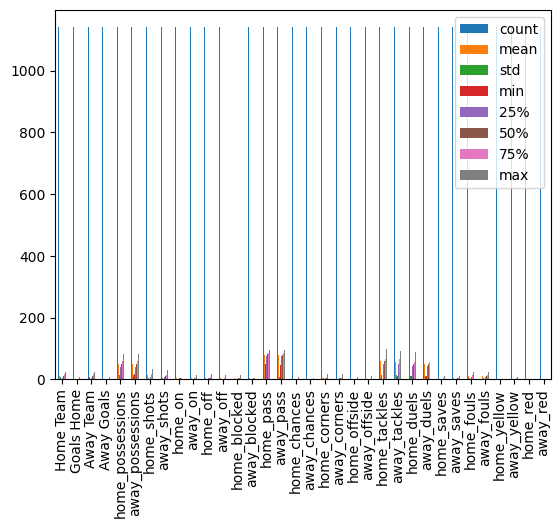

In [38]:
df.describe().T.plot(kind='bar') # the T is for transposing the rows and columns.

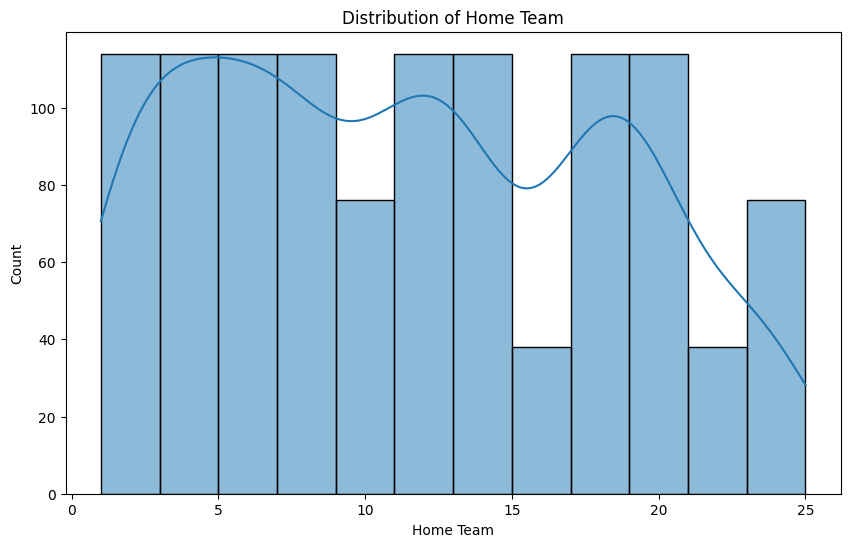

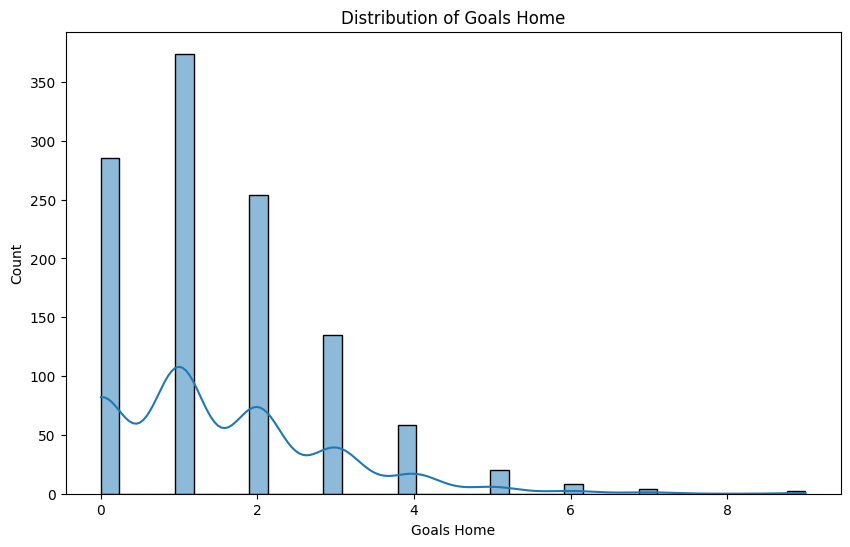

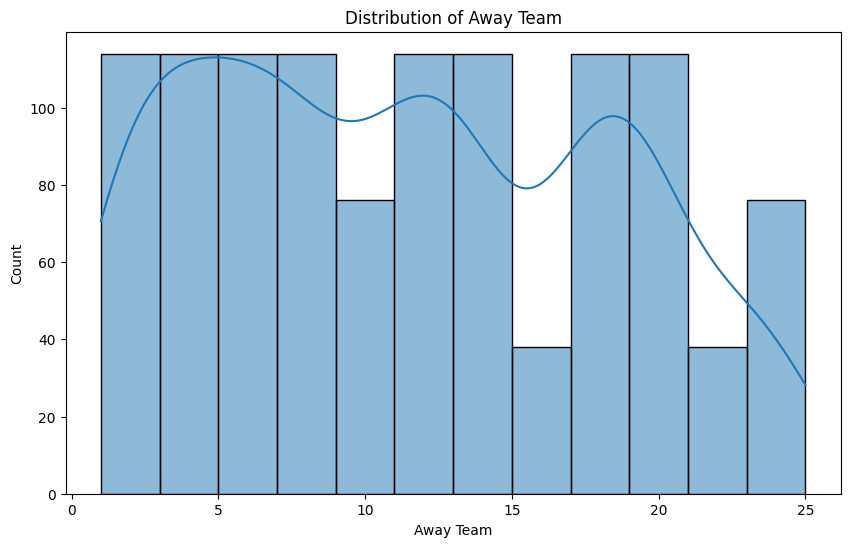

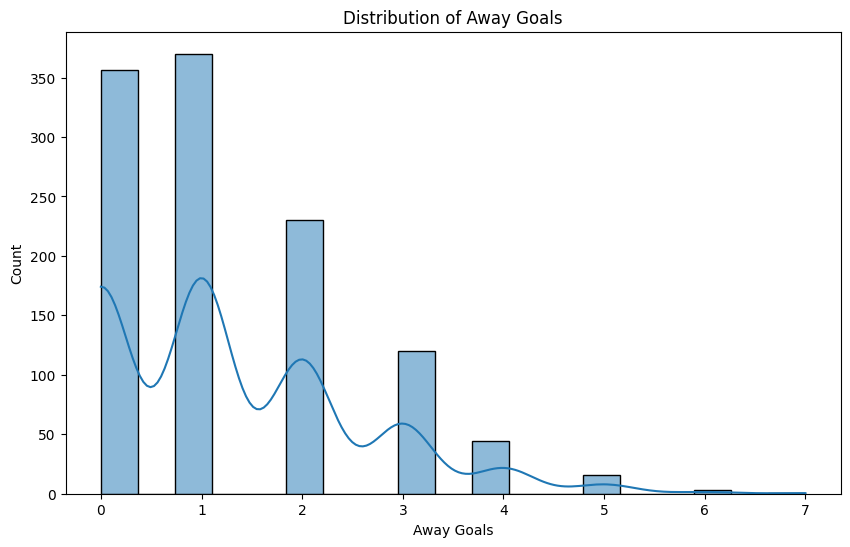

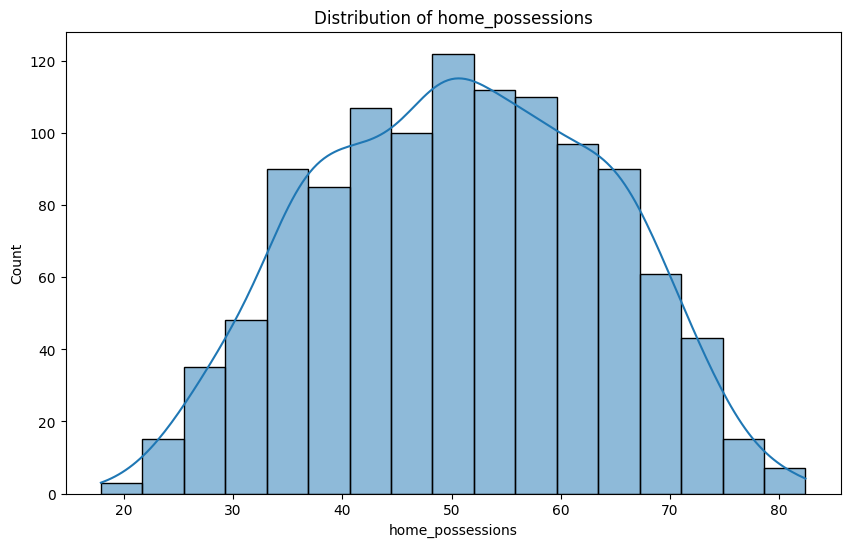

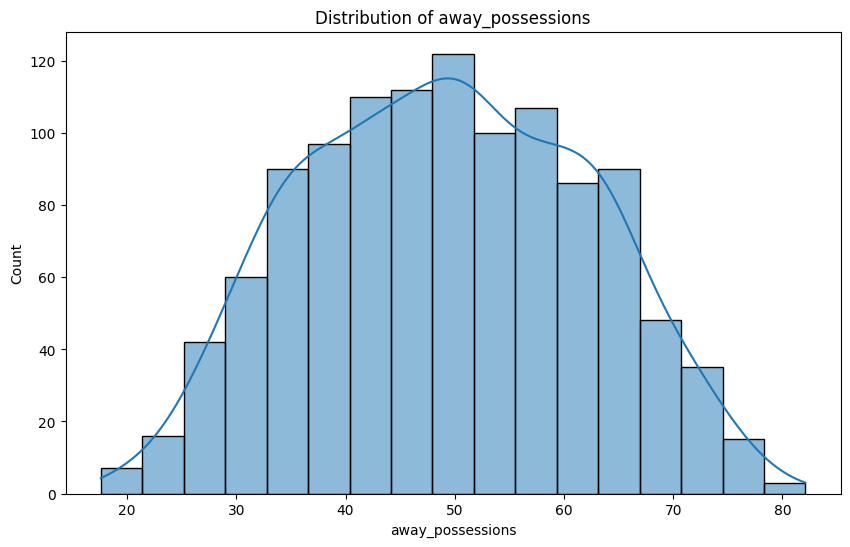

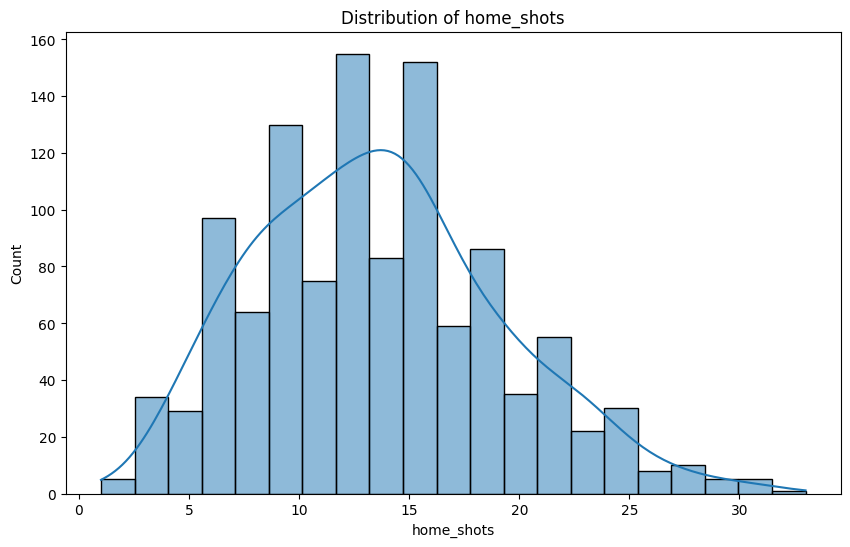

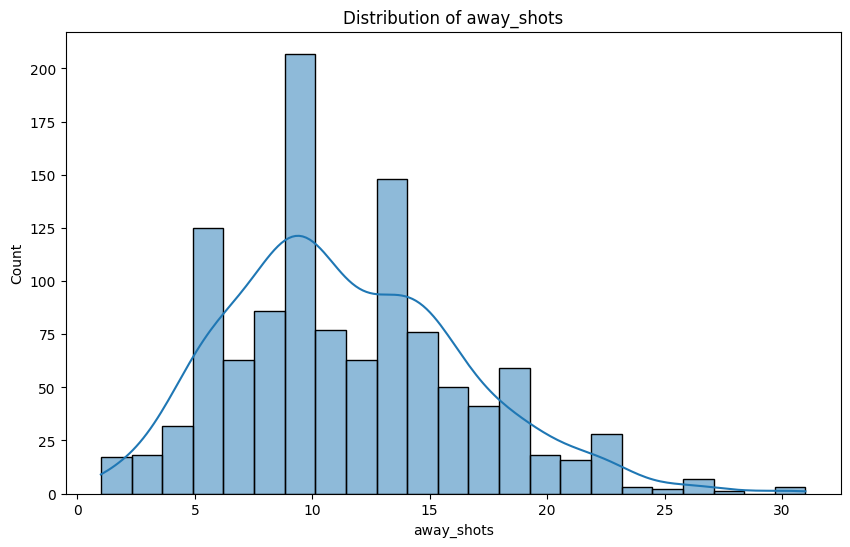

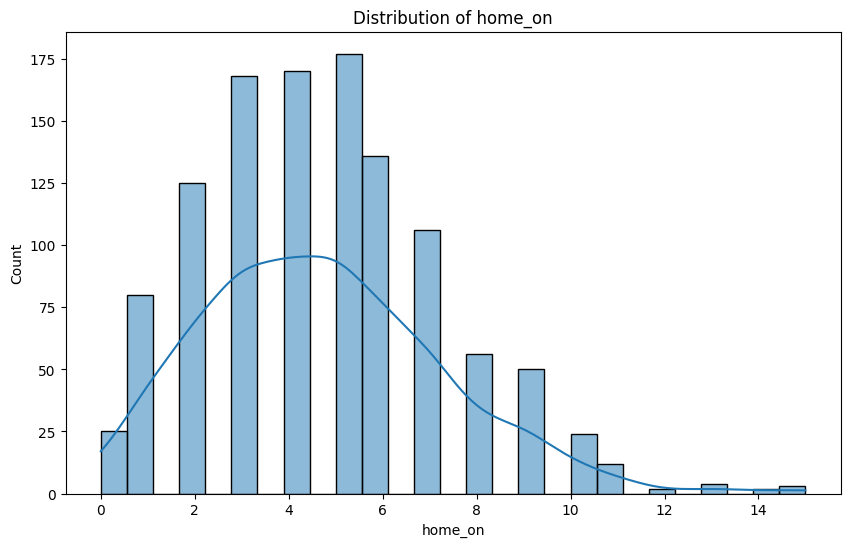

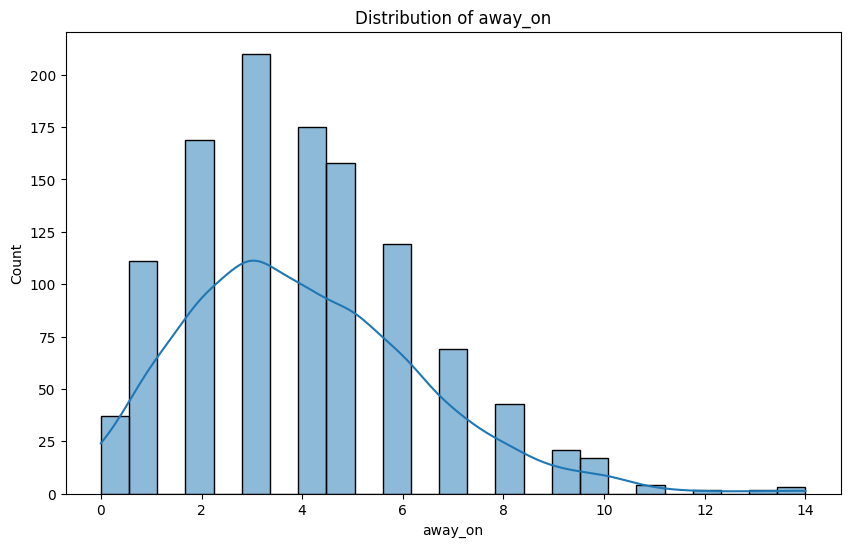

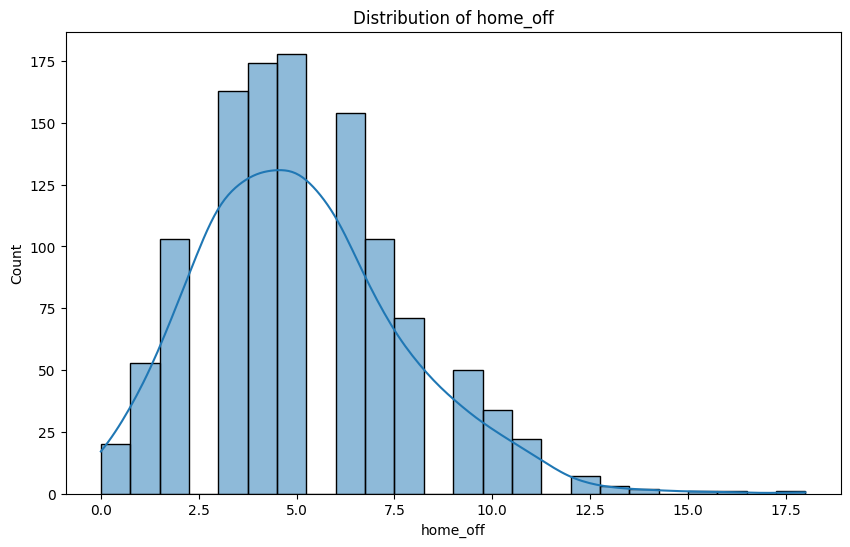

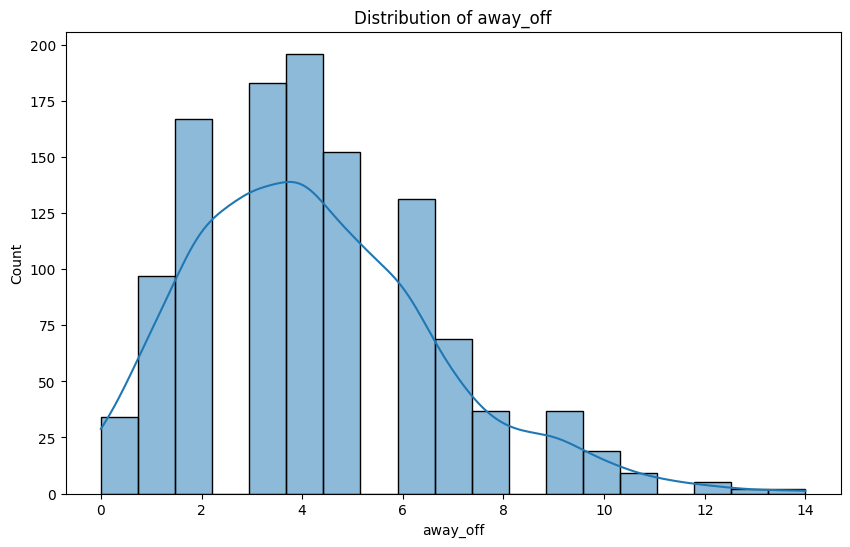

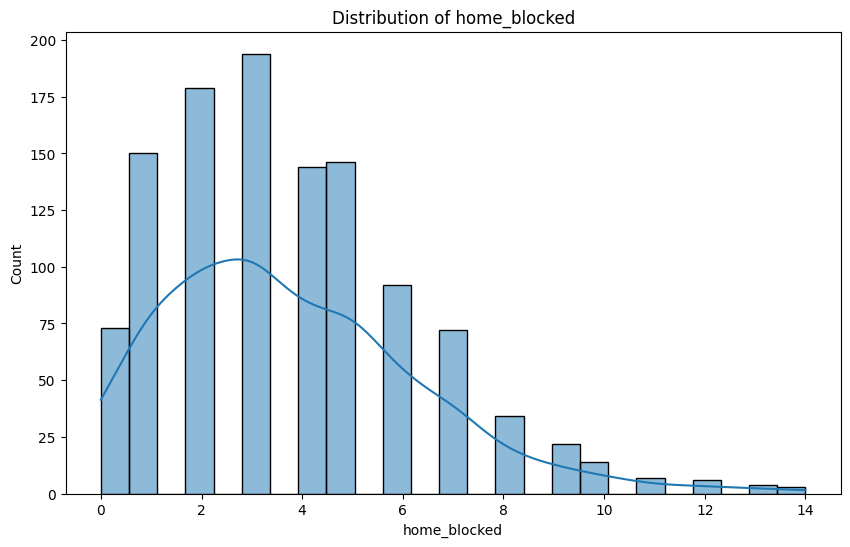

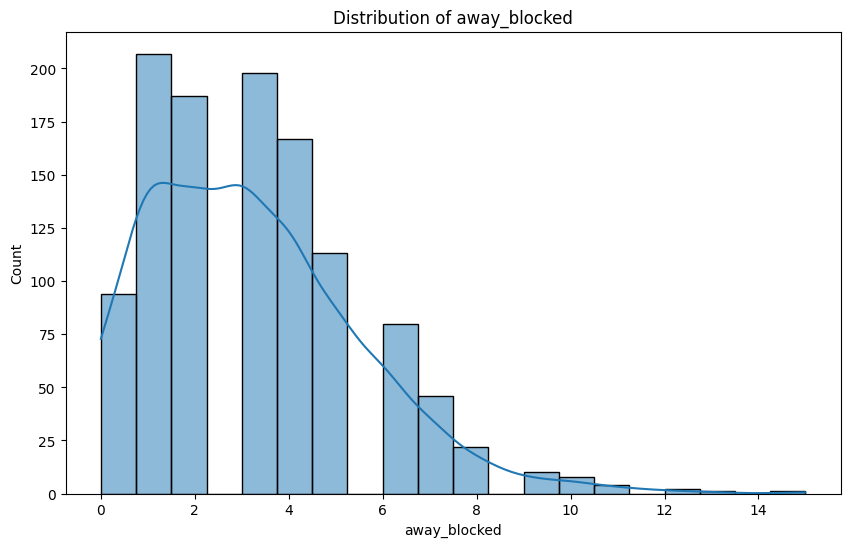

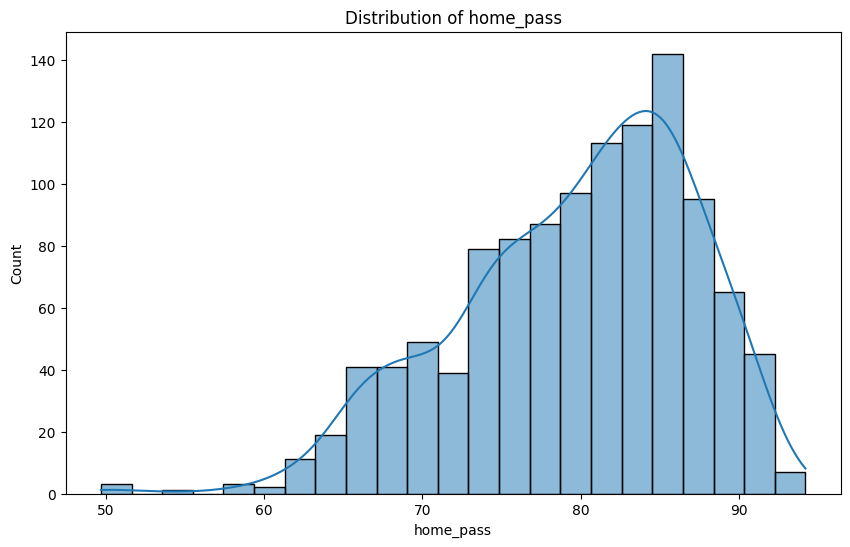

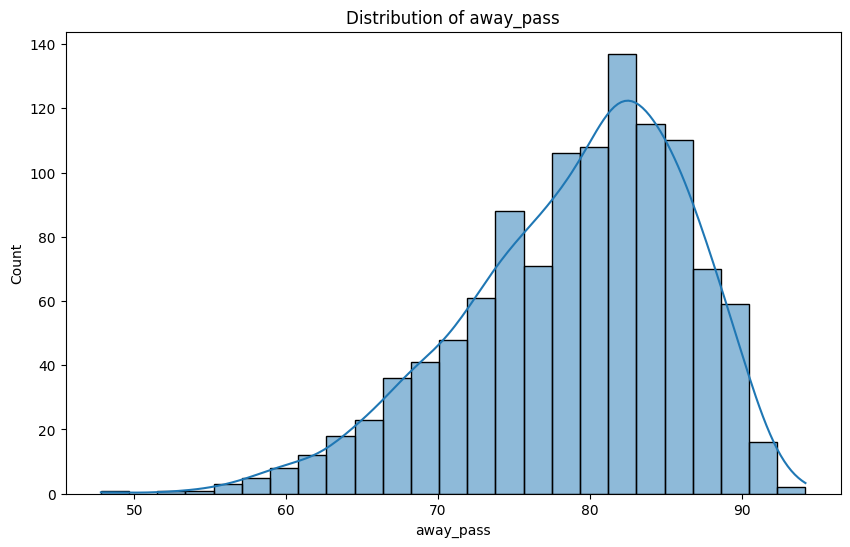

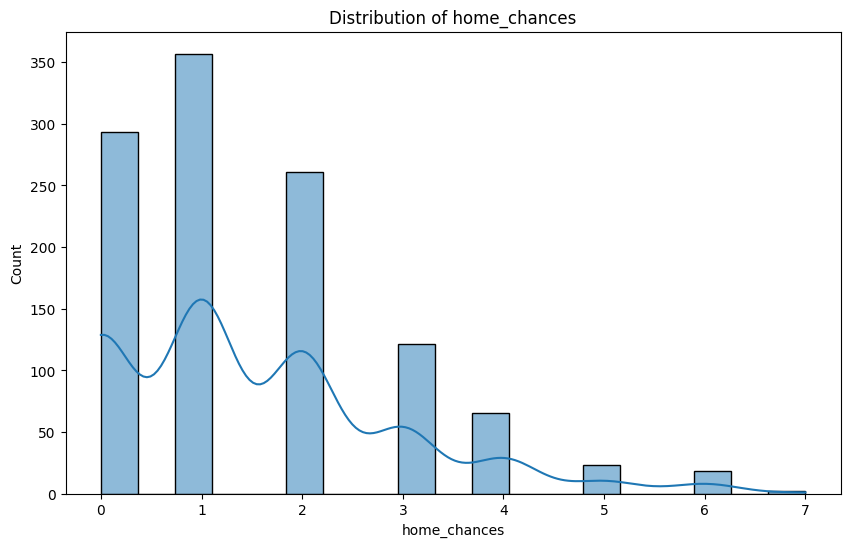

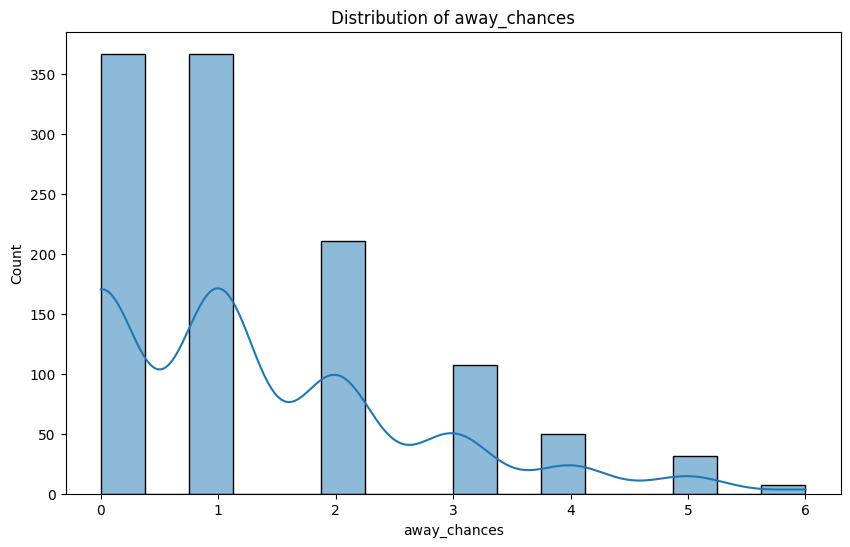

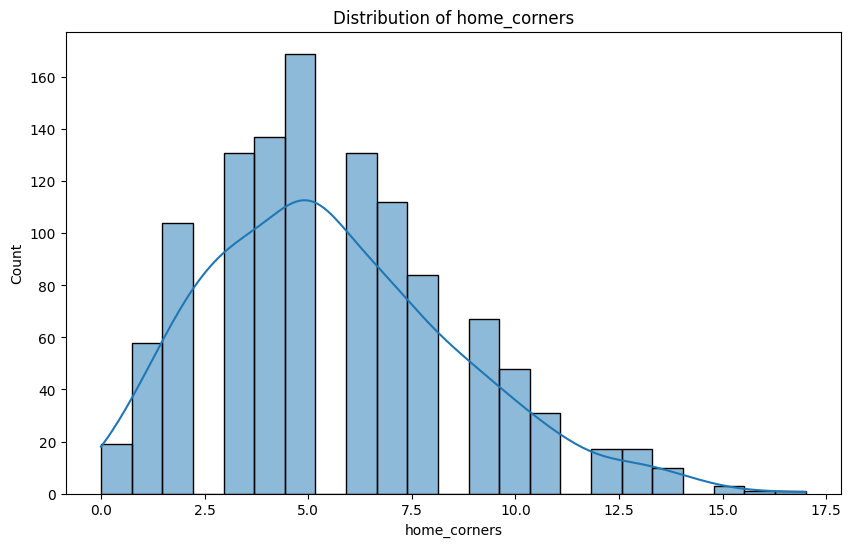

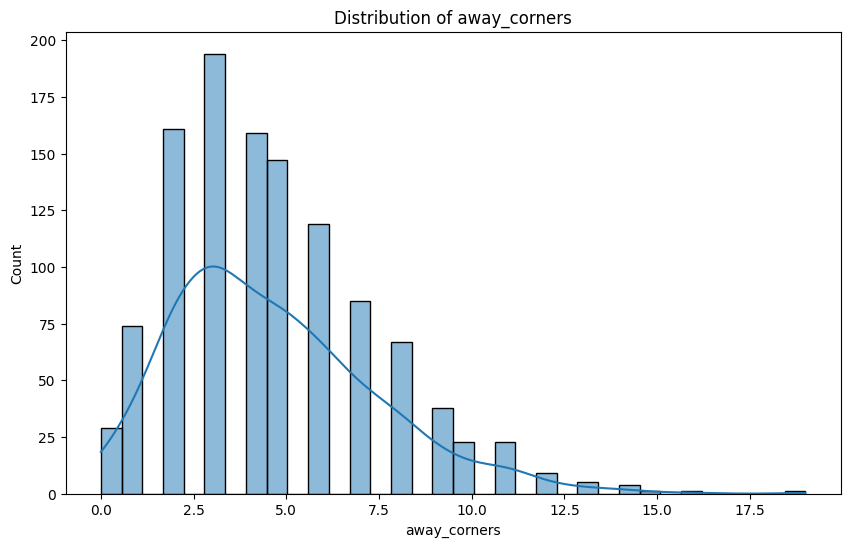

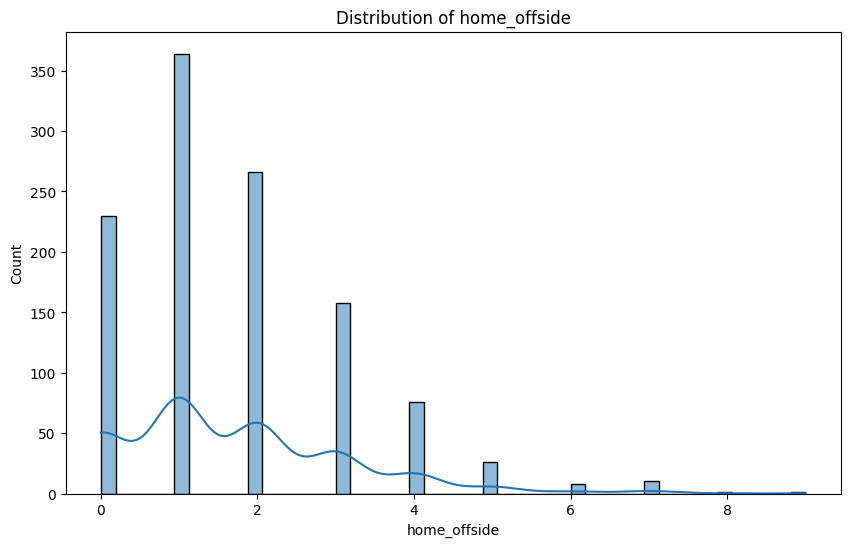

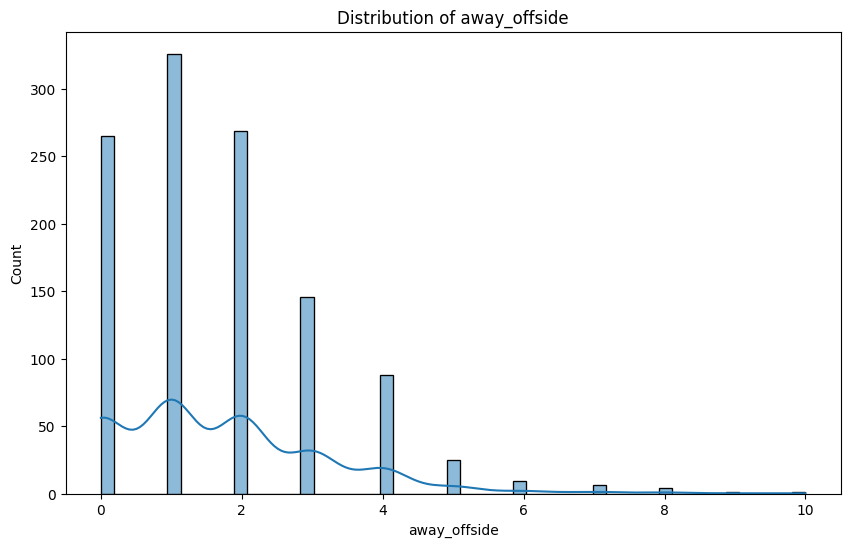

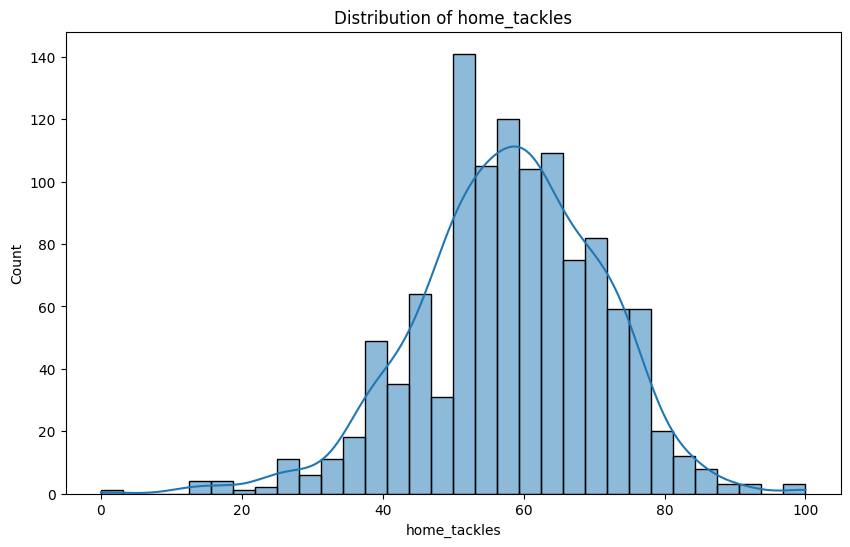

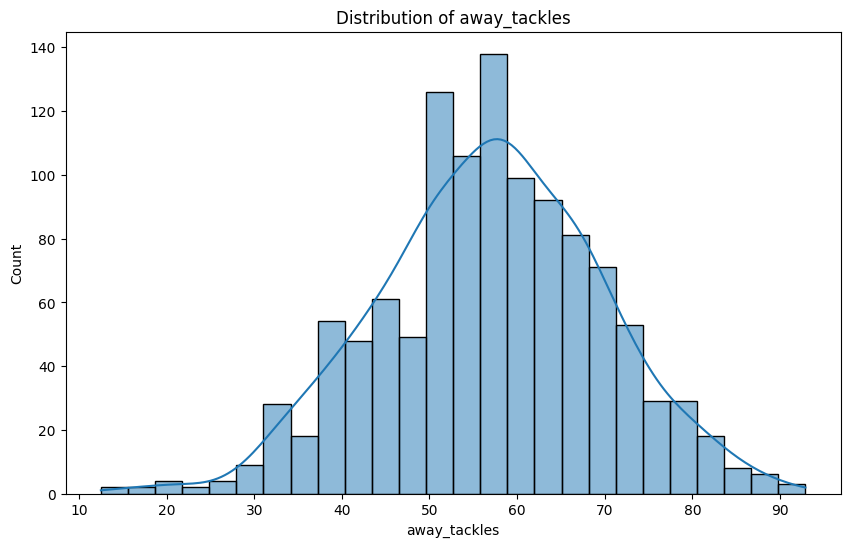

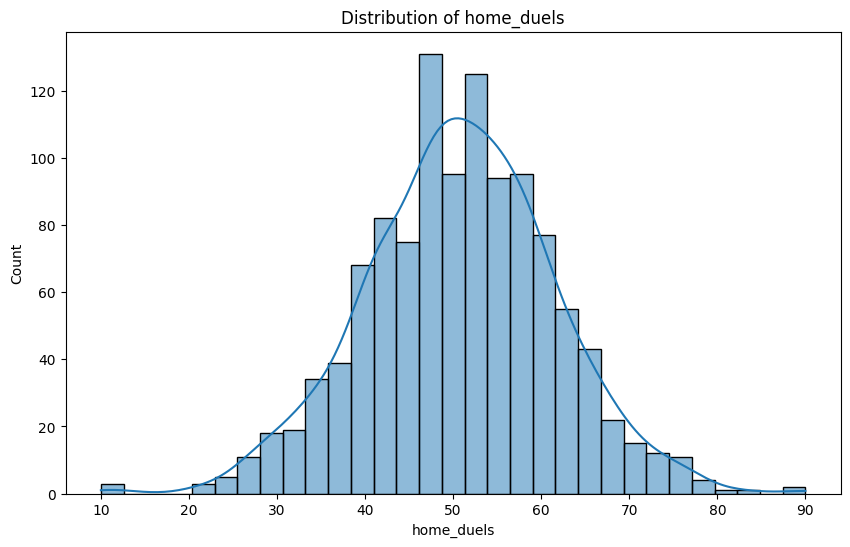

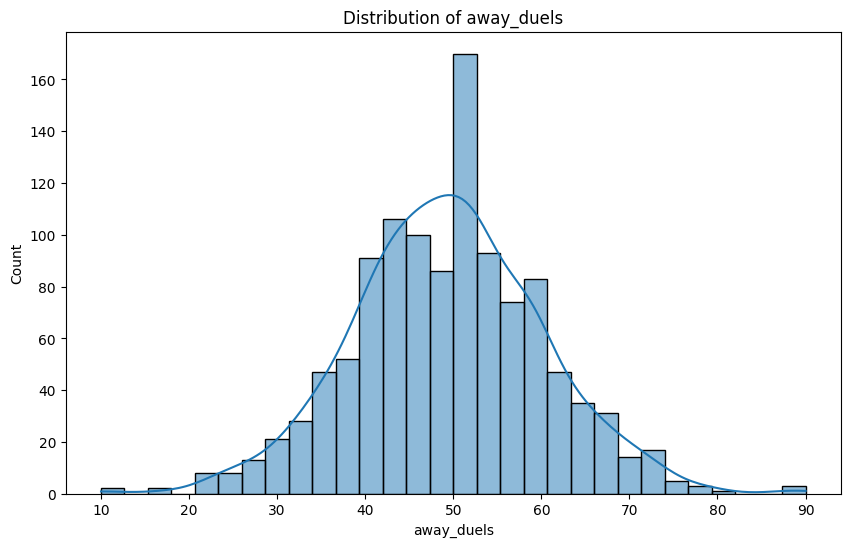

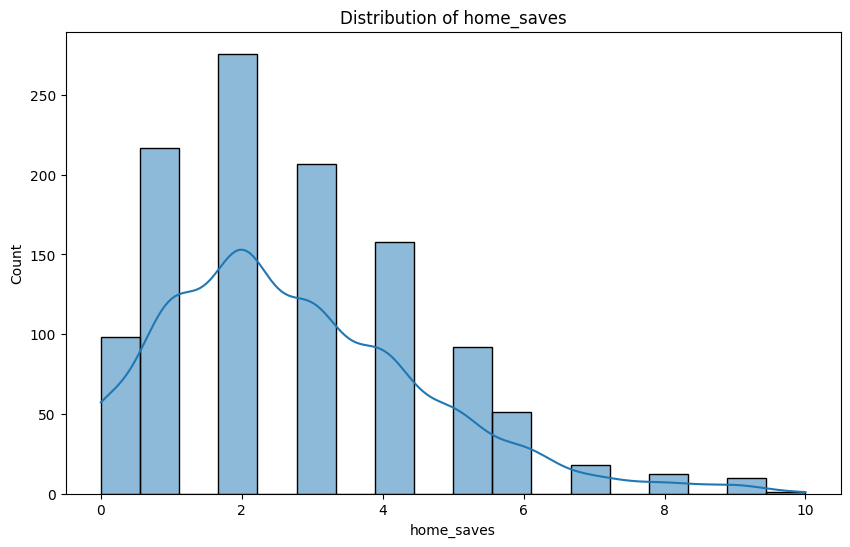

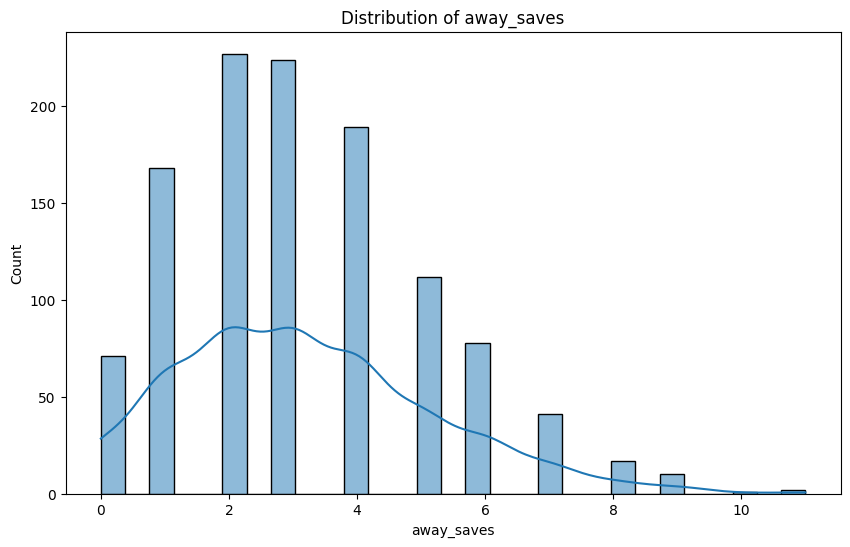

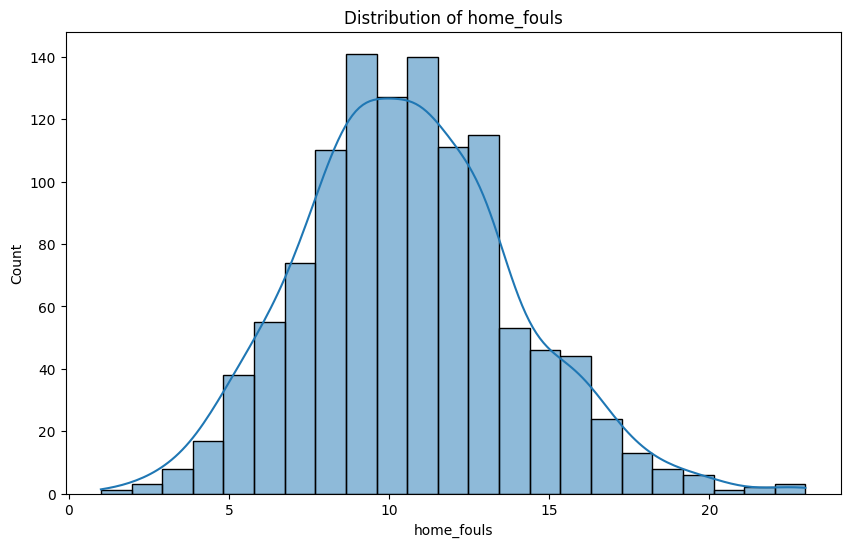

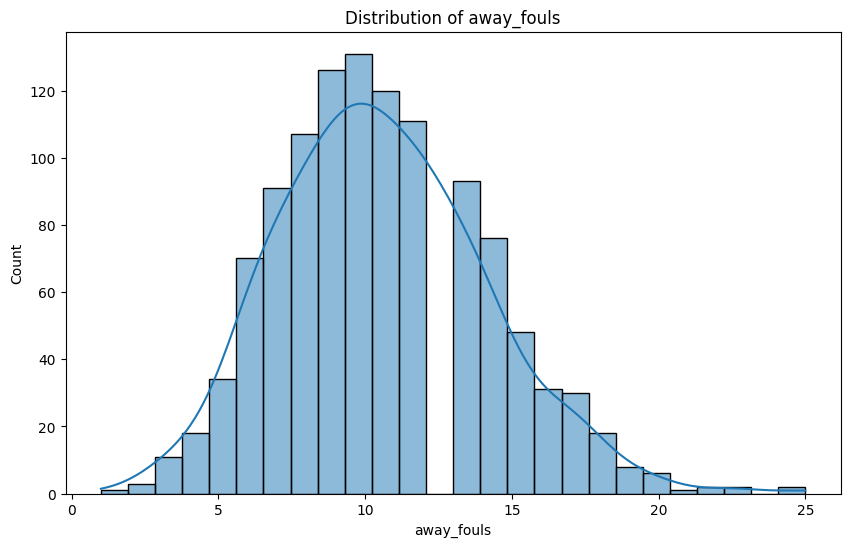

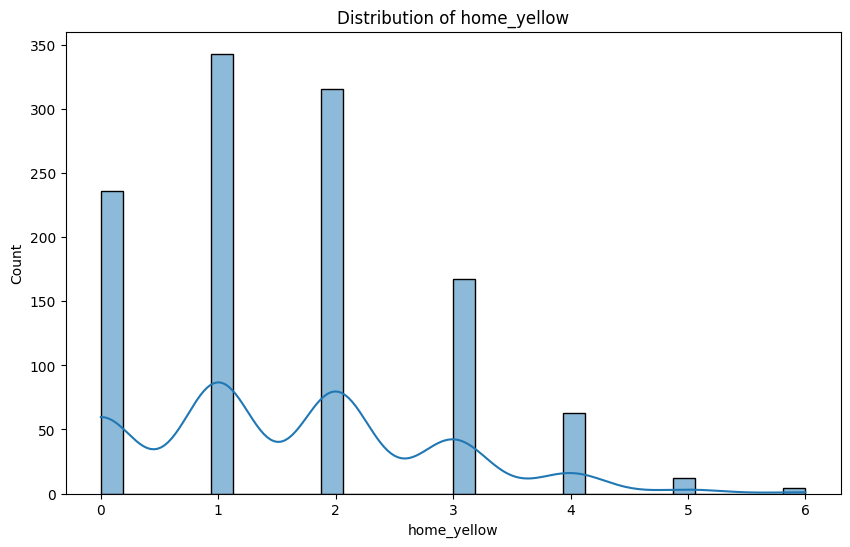

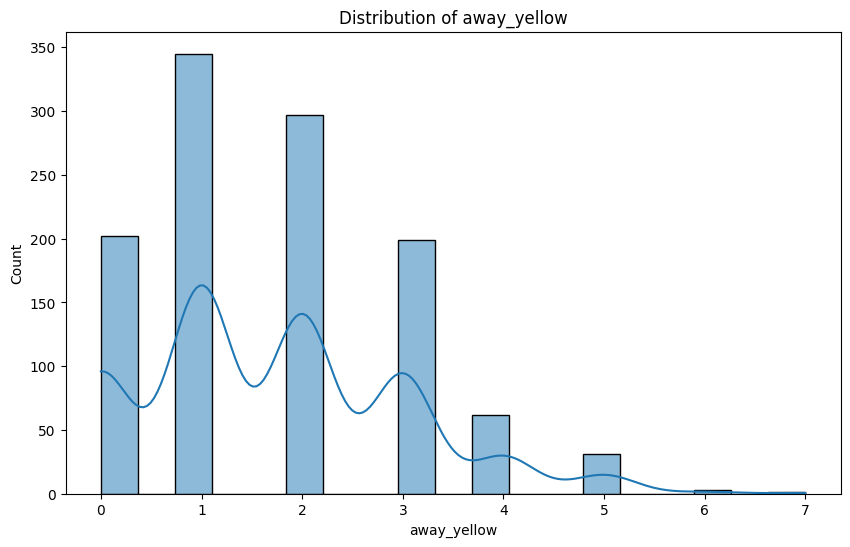

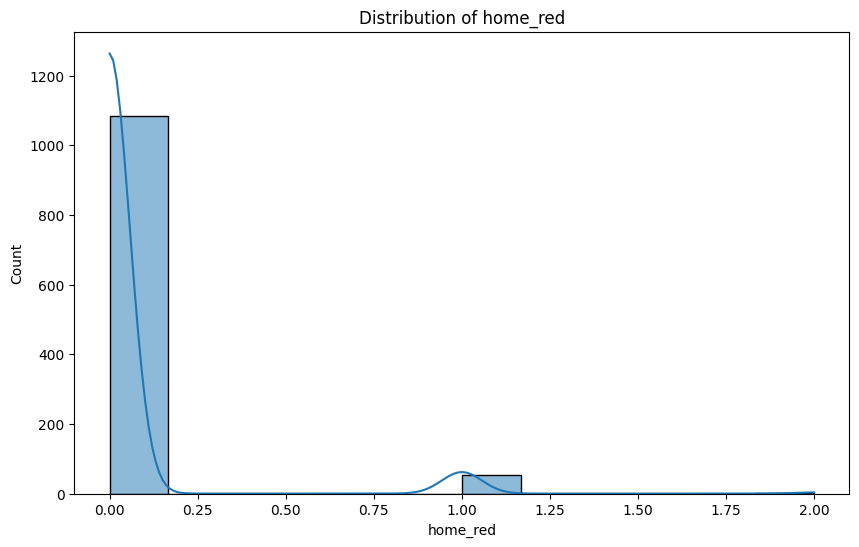

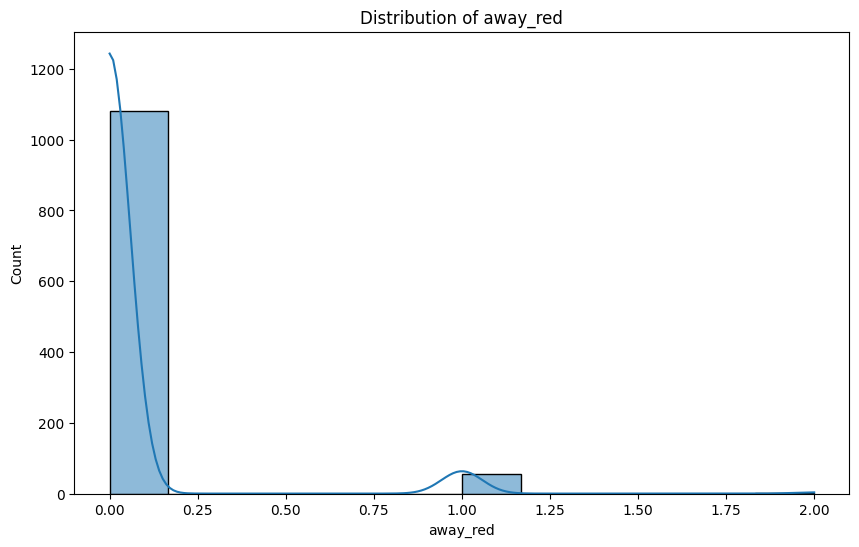

In [39]:
numeric_cols=df.select_dtypes(include=['number']).columns
for col in numeric_cols:
  plt.figure(figsize=(10,6))
  sns.histplot(df[col],kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

CORRELATION

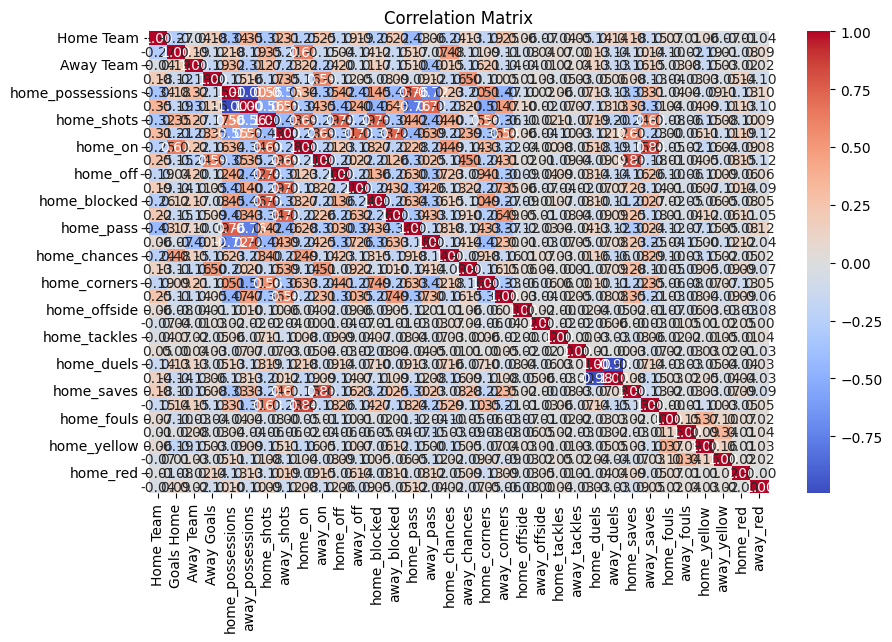

In [24]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0)
plt.title('Correlation Matrix')
plt.show()

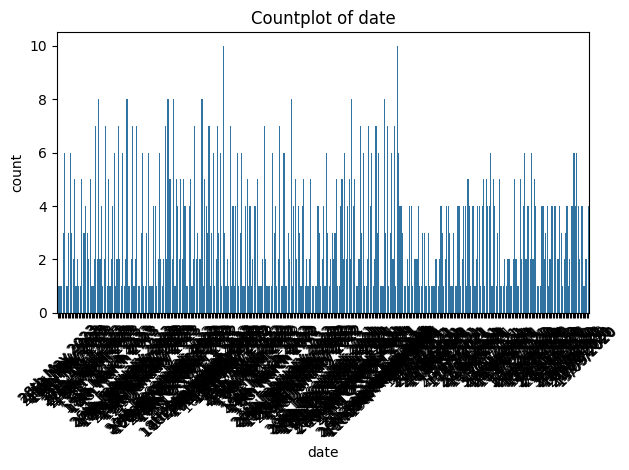

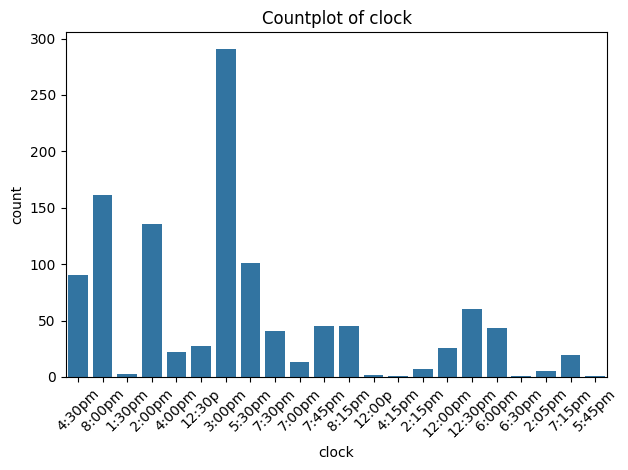

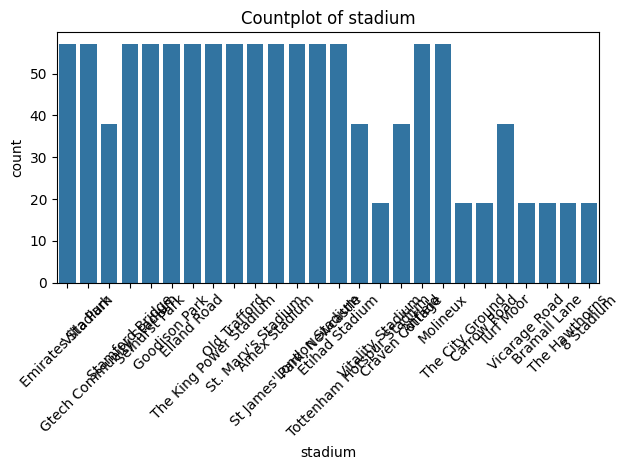

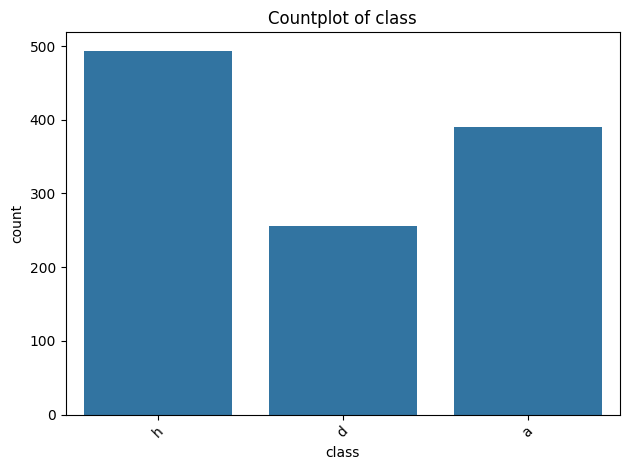

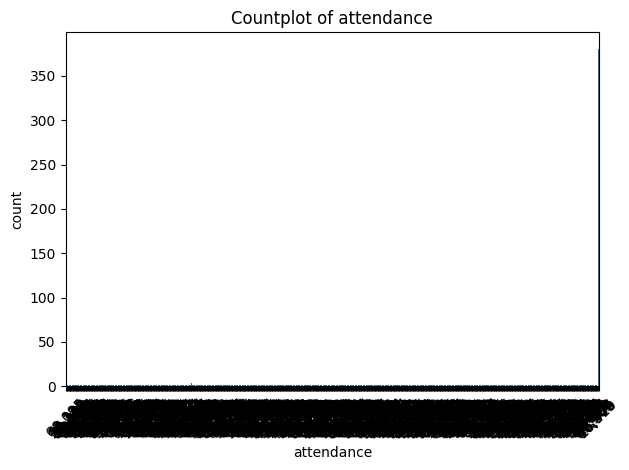

/tmp/ipython-input-3979054206.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()        # adjust spacing so labels fit


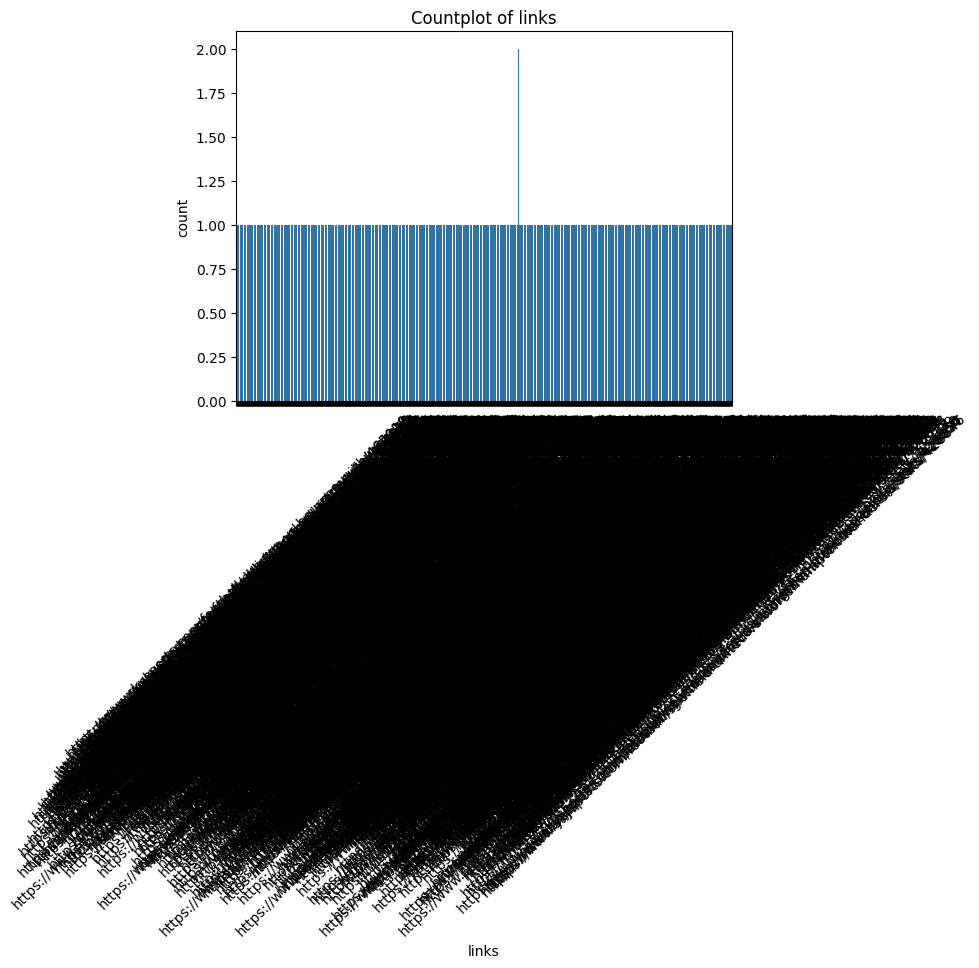

In [27]:
#categorical analysis
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.xticks(rotation=45)   # rotate category labels
        plt.title(f"Countplot of {col}")  # add a title
        plt.tight_layout()        # adjust spacing so labels fit
        plt.show()

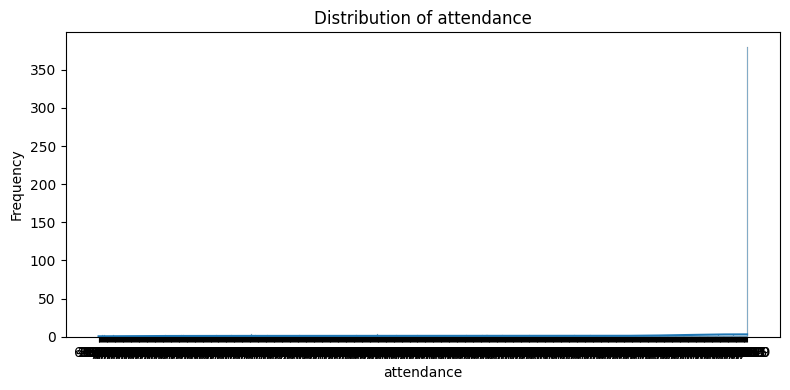

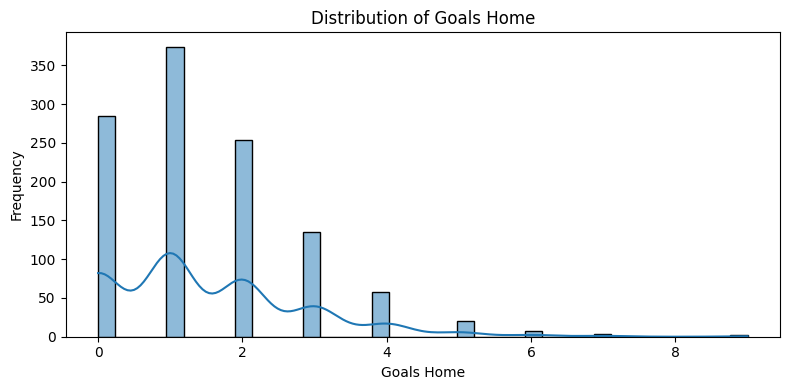

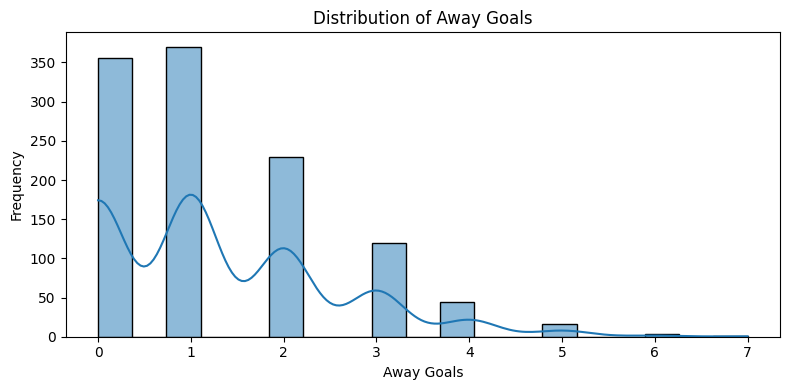

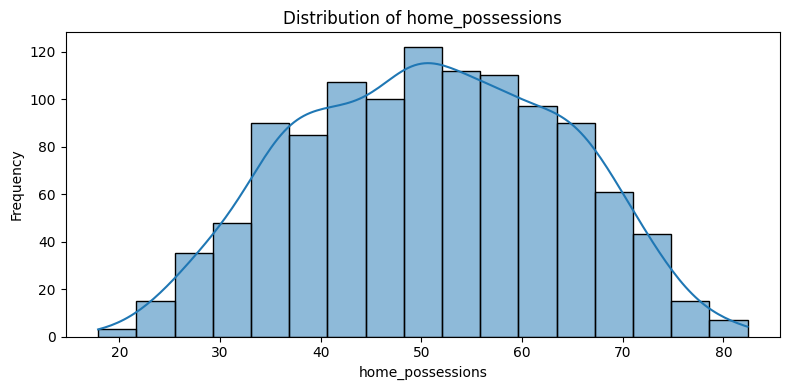

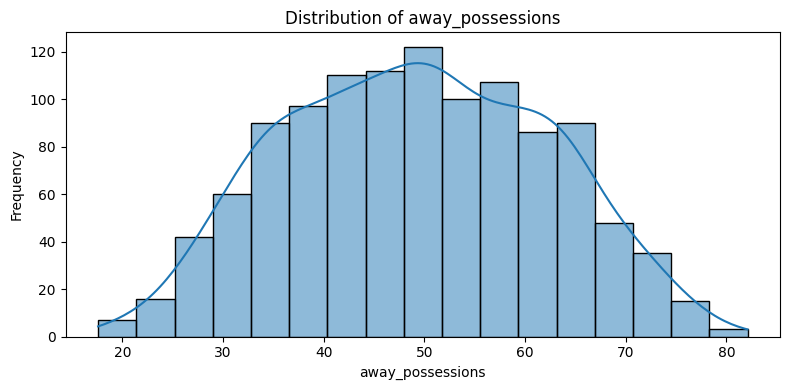

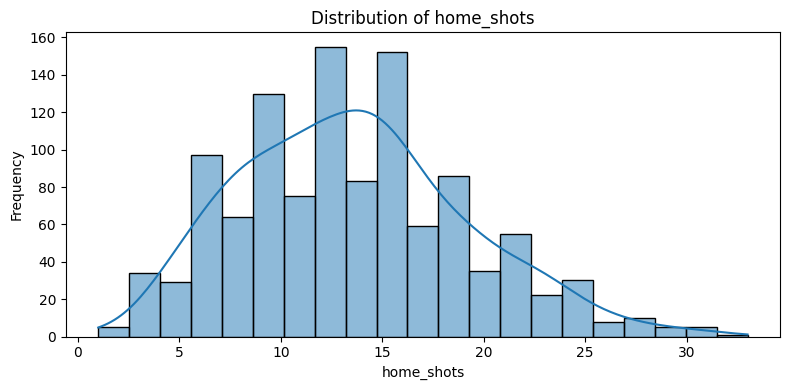

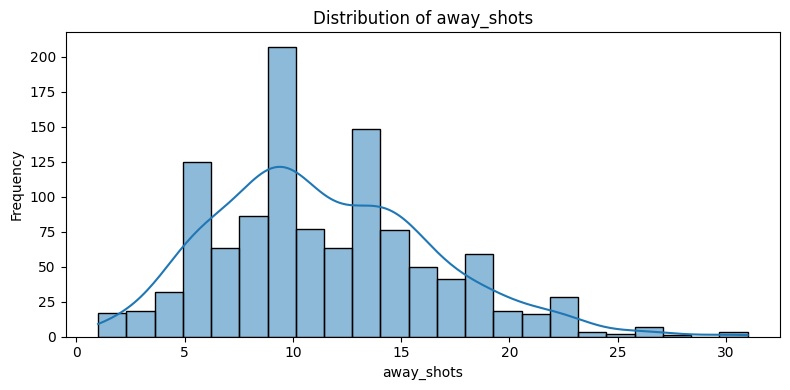

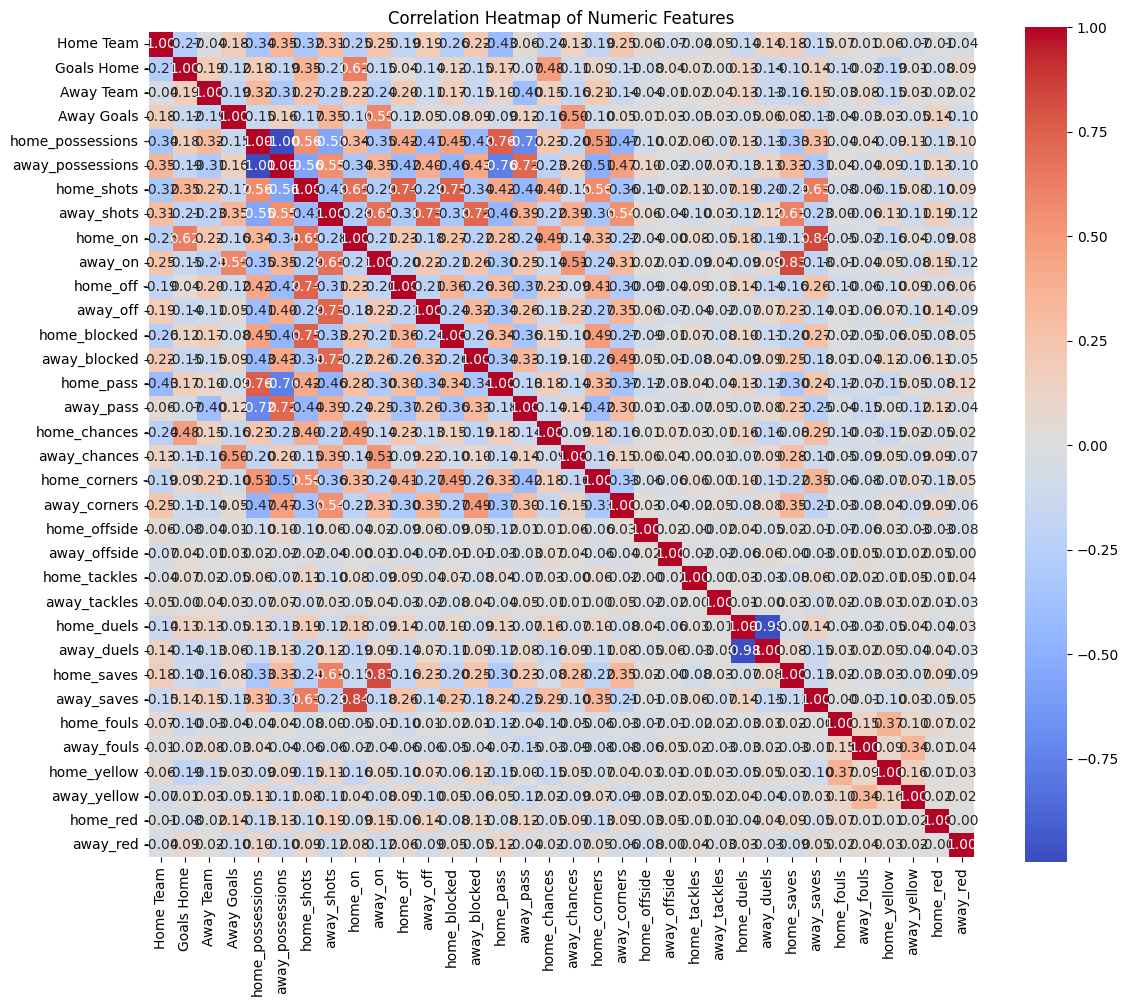

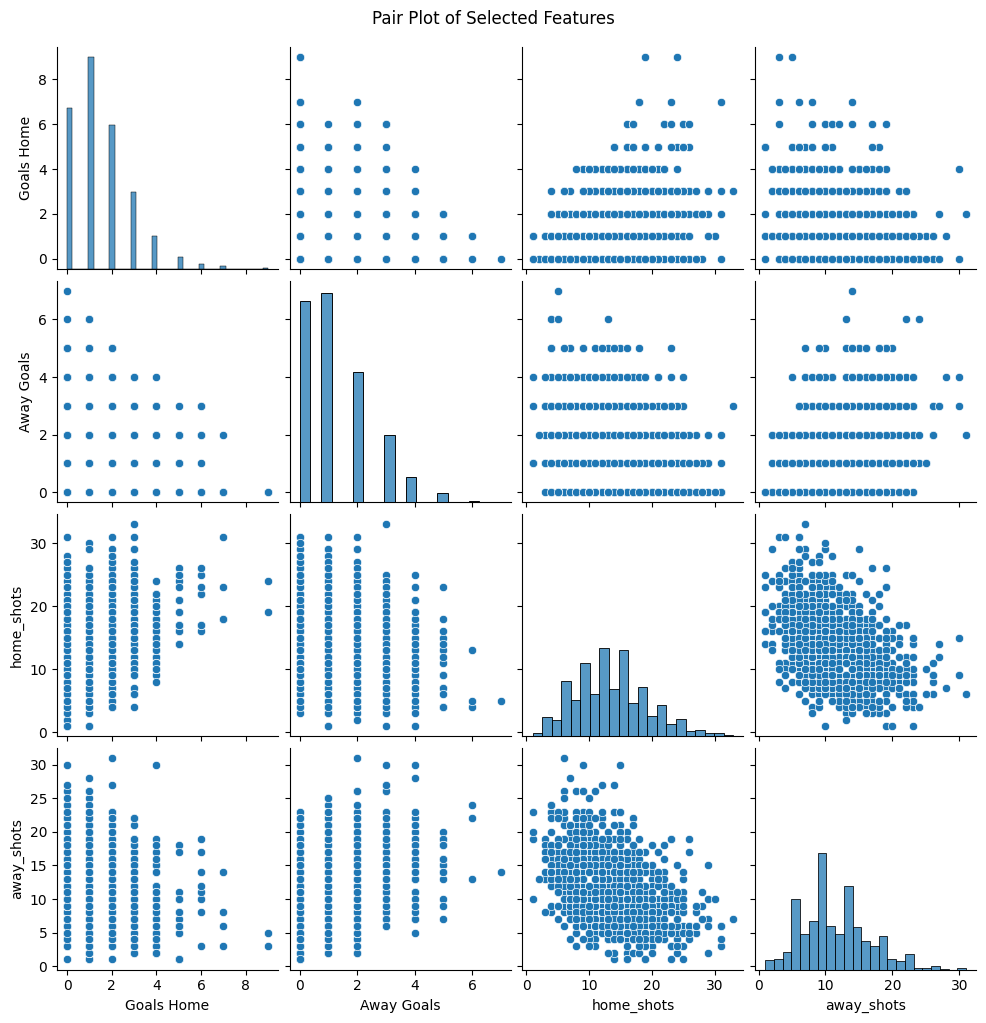

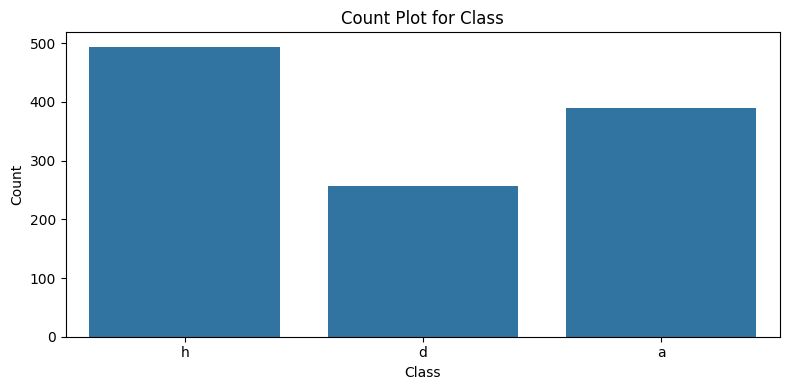

In [28]:
numeric_cols = ['attendance', 'Goals Home', 'Away Goals', 'home_possessions', 'away_possessions',
                'home_shots', 'away_shots']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Create a correlation heatmap for numeric columns if there are 4 or more
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

# Pair plot for a subset of numeric features
subset_cols = ['Goals Home', 'Away Goals', 'home_shots', 'away_shots']
sns.pairplot(df[subset_cols].dropna())
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Count plot for the 'class' column to see distribution (if class categories are interesting)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='class')
plt.title('Count Plot for Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
